In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# if you want to check some special kind of data you can use glob
import glob

# To read all the data files

In [3]:
glob.glob(r'N:\Personal_Projects\Machine_learning_projects\S&P_resources\individual_stocks_5yr/*csv')

['N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\AAL_data.csv',
 'N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\AAP_data.csv',
 'N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\ABBV_data.csv',
 'N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\ABC_data.csv',
 'N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\ABT_data.csv',
 'N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\ACN_data.csv',
 'N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\ADBE_data.csv',
 'N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\ADI_data.csv',
 'N:\\Personal_Projects\\Machine_learning_projects\\

In [4]:
len(glob.glob(r'N:\Personal_Projects\Machine_learning_projects\S&P_resources\individual_stocks_5yr/*csv'))

505

In [5]:
company_list = [
    r'N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
    r'N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv',
    r'N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\GOOG_data.csv',
    r'N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\MNST_data.csv'
]

In [6]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data, current_df], ignore_index=True)

In [7]:
all_data.shape


(4752, 7)

In [8]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [9]:
all_data.tail()

,date,open,high,low,close,volume,Name
4747,2018-02-01,67.97,68.44,67.06,67.93,1910081,MNST
4748,2018-02-02,67.66,67.86,66.58,66.63,3118313,MNST
4749,2018-02-05,66.58,66.86,63.85,63.85,3339233,MNST
4750,2018-02-06,63.10,64.32,61.15,64.21,3448613,MNST
4751,2018-02-07,63.73,65.11,63.58,64.55,2931090,MNST


In [10]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MNST'], dtype=object)

In [11]:
all_data.isnull()

,date,open,high,low,close,volume,Name
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4747,False,False,False,False,False,False,False
4748,False,False,False,False,False,False,False
4749,False,False,False,False,False,False,False
4750,False,False,False,False,False,False,False


In [12]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [13]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [14]:
pd.to_datetime(all_data['date'])

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [15]:
tech_list = all_data['Name'].unique()

In [16]:
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MNST'], dtype=object)

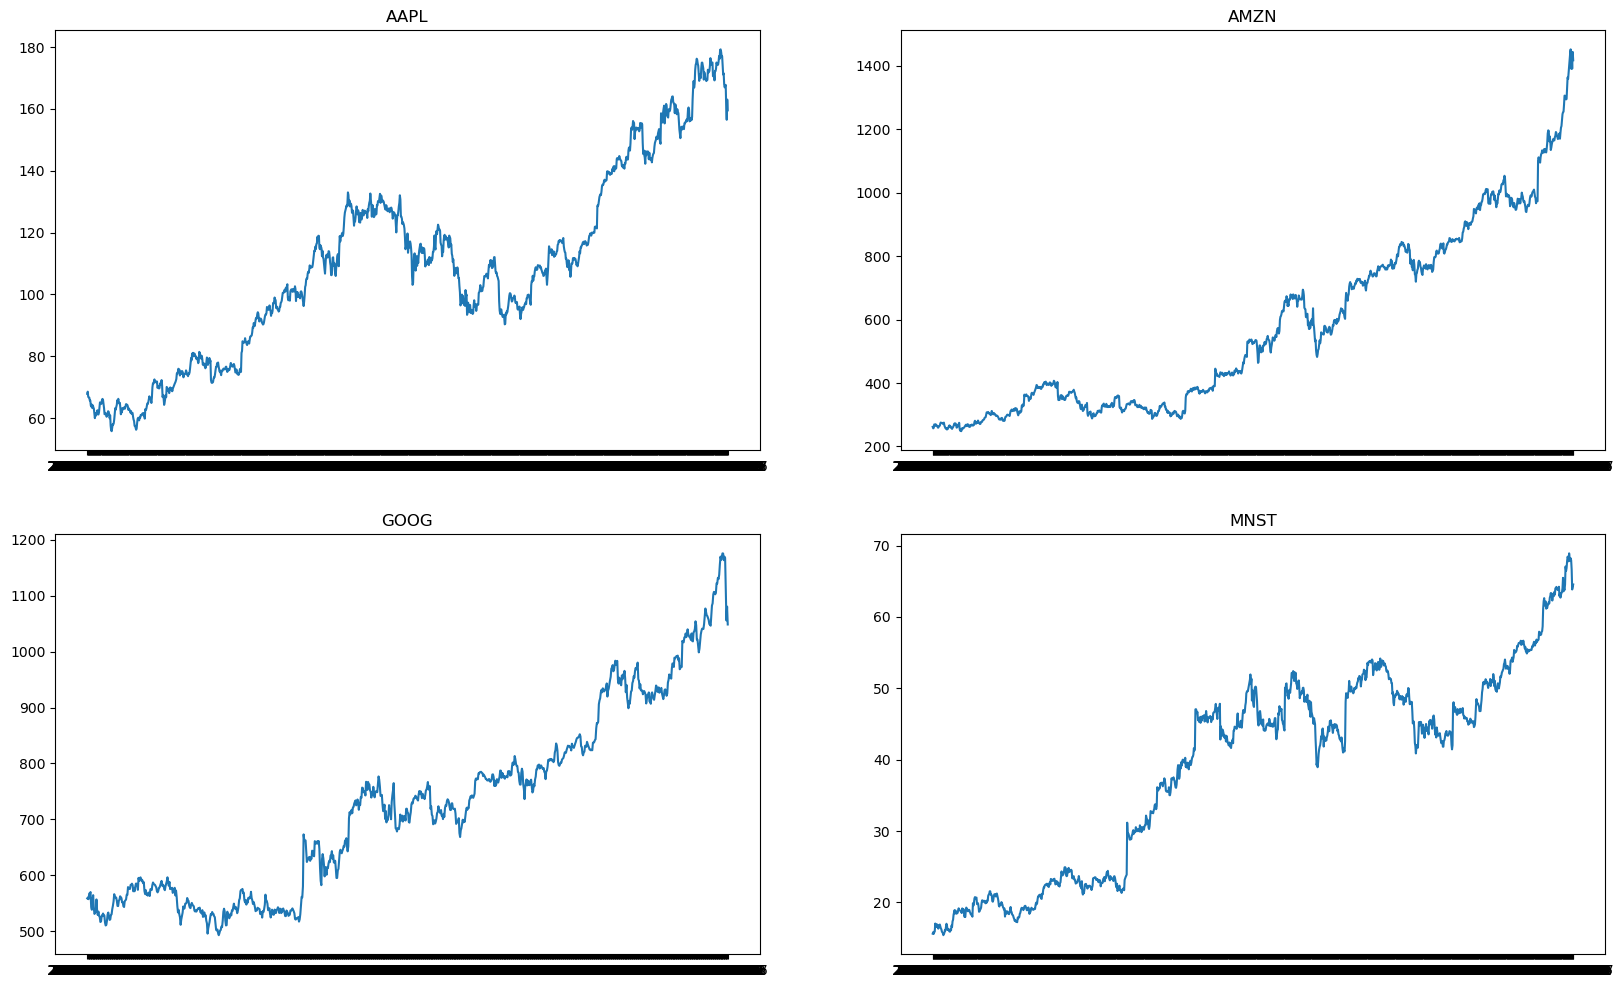

In [17]:
plt.figure(figsize=(20, 12))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter1 = all_data['Name'] == company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)

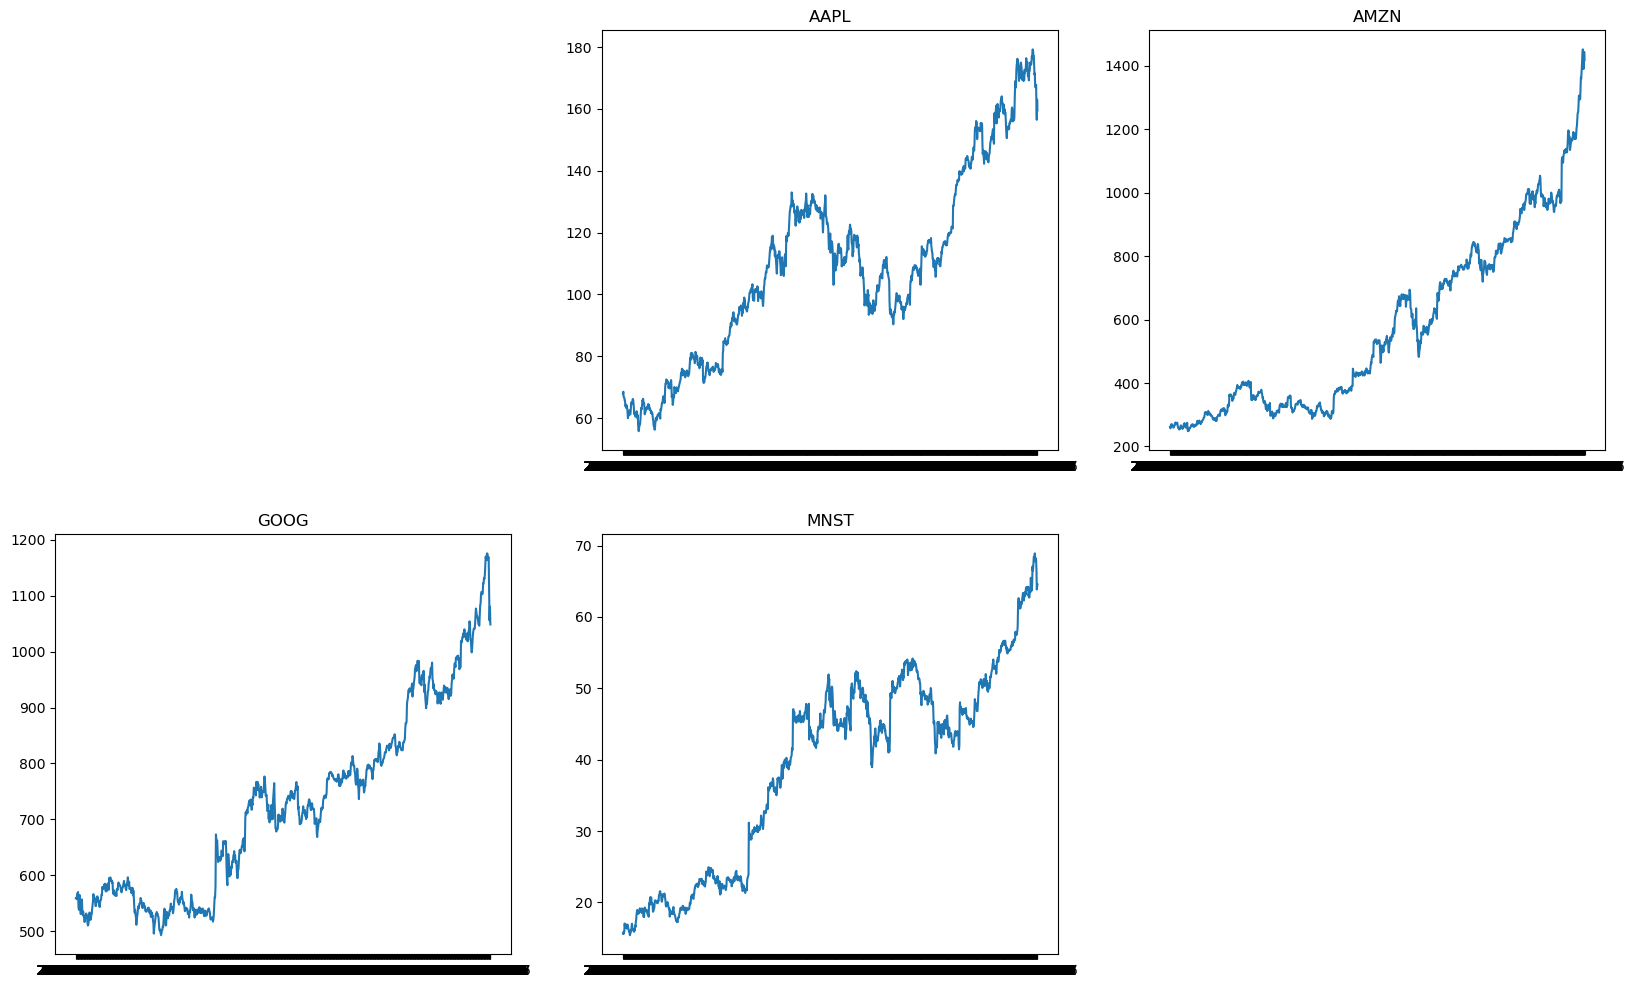

In [18]:
plt.figure(figsize=(20, 12))

for index, company in enumerate(tech_list, 2):
    plt.subplot(2, 3, index)
    filter1 = all_data['Name'] == company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)

# What was the moving average of the various stocks?

In [19]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [20]:
all_data['close']

0       67.8542
1       68.5614
2       66.8428
3       66.7156
4       66.6556
         ...   
4747    67.9300
4748    66.6300
4749    63.8500
4750    64.2100
4751    64.5500
Name: close, Length: 4752, dtype: float64

In [21]:
all_data['close'].rolling(window=10).mean()

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
4747    68.042
4748    68.019
4749    67.627
4750    67.203
4751    66.830
Name: close, Length: 4752, dtype: float64

In [22]:
all_data['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [23]:
all_data

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
4747,2018-02-01,67.9700,68.4400,67.0600,67.9300,1910081,MNST
4748,2018-02-02,67.6600,67.8600,66.5800,66.6300,3118313,MNST
4749,2018-02-05,66.5800,66.8600,63.8500,63.8500,3339233,MNST
4750,2018-02-06,63.1000,64.3200,61.1500,64.2100,3448613,MNST


In [24]:
new_data = all_data.copy()

In [25]:
ma_day = [10,20,50,100, 200]

for ma in ma_day:
    new_data['close_' + str(ma)] = new_data['close'].rolling(ma).mean()

In [26]:
new_data

,date,open,high,low,close,volume,Name,close_10,close_20,close_50,close_100,close_200
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN,NaN,NaN
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN,NaN,NaN
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN,NaN,NaN
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4747,2018-02-01,67.9700,68.4400,67.0600,67.9300,1910081,MNST,68.042,66.3100,64.2926,60.6362,55.78025
4748,2018-02-02,67.6600,67.8600,66.5800,66.6300,3118313,MNST,68.019,66.4735,64.4020,60.7359,55.88790
4749,2018-02-05,66.5800,66.8600,63.8500,63.8500,3339233,MNST,67.627,66.4915,64.4536,60.8136,55.97845
4750,2018-02-06,63.1000,64.3200,61.1500,64.2100,3448613,MNST,67.203,66.5005,64.5124,60.8919,56.07255


In [27]:
new_data.tail(15)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50,close_100,close_200
4737,2018-01-18,67.01,67.220,65.69,66.47,1762518,MNST,64.578,64.0850,62.7618,59.4216,54.65490
4738,2018-01-19,66.63,67.340,66.53,66.86,2501578,MNST,64.928,64.2175,62.9486,59.5380,54.75910
4739,2018-01-22,66.84,67.800,66.75,67.77,1823960,MNST,65.356,64.4050,63.1456,59.6641,54.86830
4740,2018-01-23,67.73,68.630,67.38,68.45,2499503,MNST,65.798,64.6370,63.3546,59.7949,54.98180
4741,2018-01-24,68.68,68.770,68.14,68.28,2138892,MNST,66.078,64.8625,63.5466,59.9182,55.09395
4742,2018-01-25,68.55,68.670,67.65,67.80,2672474,MNST,66.499,65.0605,63.6794,60.0380,55.20385
4743,2018-01-26,67.84,69.000,67.69,68.91,1758362,MNST,66.994,65.2945,63.8136,60.1663,55.32160
4744,2018-01-29,69.60,70.215,67.56,68.29,3091849,MNST,67.446,65.5630,63.9268,60.2857,55.43605
4745,2018-01-30,68.25,69.010,67.79,67.90,2429019,MNST,67.780,65.7935,64.0528,60.4014,55.55105
4746,2018-01-31,67.64,68.580,67.55,68.23,2504603,MNST,67.896,66.0695,64.1774,60.5201,55.66715


In [28]:
# Using pandasd plots for timeseries problems
# and to make the date as your index in pandas yoiuy can do it like this
new_data.set_index('date', inplace=True)


In [29]:
new_data # here you can see i have indexed it.

,open,high,low,close,volume,Name,close_10,close_20,close_50,close_100,close_200
date,,,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,67.9700,68.4400,67.0600,67.9300,1910081,MNST,68.042,66.3100,64.2926,60.6362,55.78025
2018-02-02,67.6600,67.8600,66.5800,66.6300,3118313,MNST,68.019,66.4735,64.4020,60.7359,55.88790
2018-02-05,66.5800,66.8600,63.8500,63.8500,3339233,MNST,67.627,66.4915,64.4536,60.8136,55.97845


In [30]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50', 'close_100', 'close_200'],
      dtype='object')

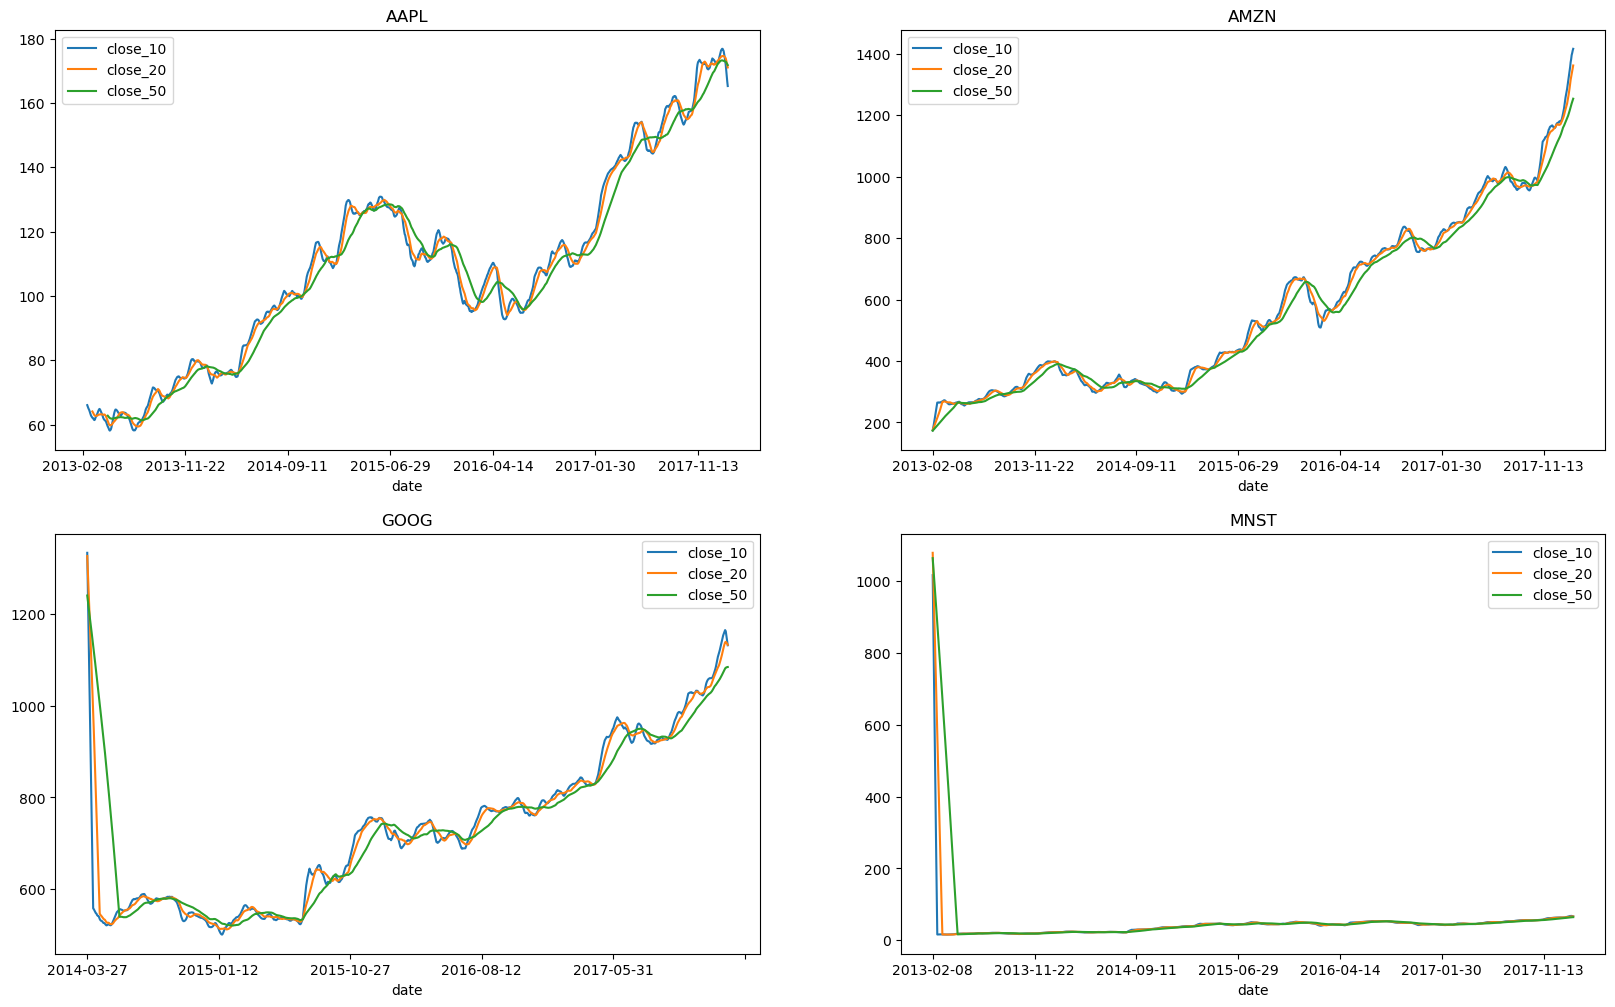

In [31]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list, 1):
    plt.subplot(2,2,index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10',
       'close_20', 'close_50']].plot(ax=plt.gca())# this is by using pandas plot
    plt.title(company)

# Closing proice change in the apple stock

In [32]:
apple = pd.read_csv(r'N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv')

In [33]:
apple

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [34]:
apple['Daily return(in %)'] = apple['close'].pct_change()*100

In [35]:
apple.head(5)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [36]:
import plotly.express as px


In [37]:
px.line(apple, x="date", y="Daily return(in %)")

# Performing resampling analysis of closing price[HERE resampling means yearly, quaterly, etc., for time series]

In [38]:
apple.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object

In [39]:
apple['date'] = pd.to_datetime(apple['date'])

In [40]:
apple.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

In [41]:
apple.head()

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [42]:
#Make row indexes as day
apple.set_index('date', inplace=True)

In [43]:
apple

,open,high,low,close,volume,Name,Daily return(in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934
...,...,...,...,...,...,...,...
2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,0.209043
2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-4.339015
2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,-2.498442


In [44]:
apple['close'].resample('M').mean()# here M means monthly

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

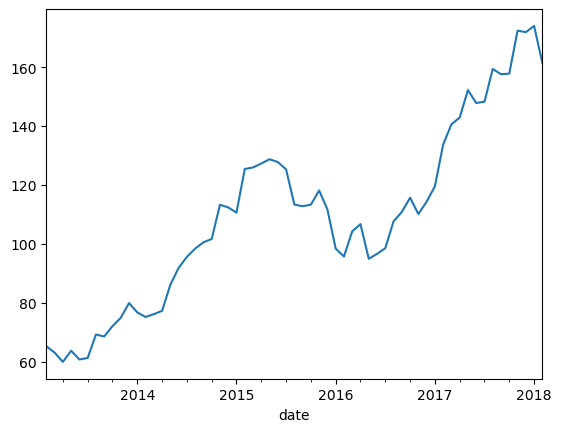

In [45]:
apple['close'].resample('M').mean().plot()# here M means monthly

<Axes: xlabel='date'>

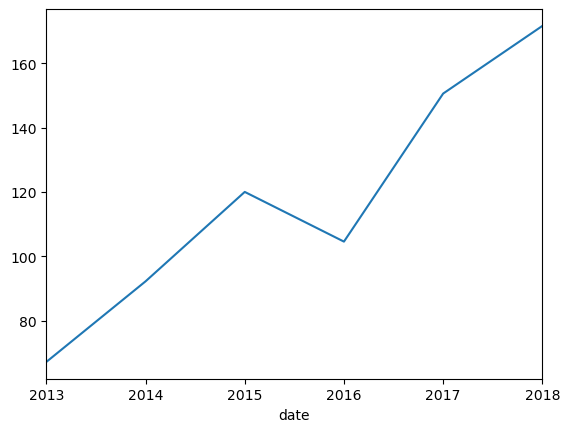

In [46]:
apple['close'].resample('Y').mean().plot()# here M means YEARLY

<Axes: xlabel='date'>

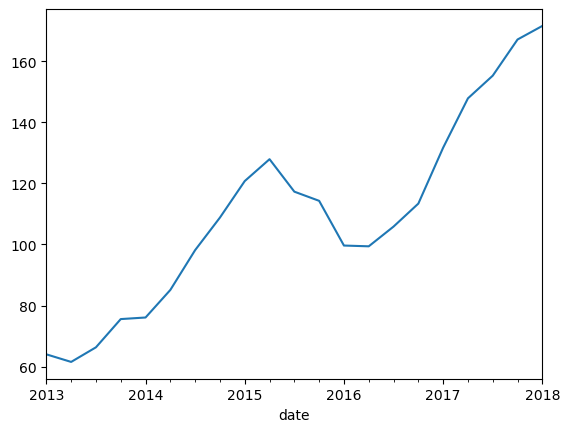

In [47]:
apple['close'].resample('Q').mean().plot()# here M means quaterly

# CHECKING  if the closing prices of these tech companies (amazon, apple, google, Microsoft) are correlated or not

In [51]:
company_list = [
    r'N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
    r'N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv',
    r'N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\GOOG_data.csv',
    r'N:\\Personal_Projects\\Machine_learning_projects\\S&P_resources\\individual_stocks_5yr\\MNST_data.csv'
]

In [52]:
appl = pd.read_csv(company_list[0])
amz = pd.read_csv(company_list[1])
goog = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])


In [53]:
closing_price = pd.DataFrame()

In [55]:
closing_price['apple_close'] = app['close']
closing_price['amazon_close'] = amz['close']
closing_price['google_close'] = goog['close']
closing_price['microsoft_close'] = msft['close']

In [56]:
closing_price

,apple_close,amazon_close,google_close,microsoft_close
0,67.8542,261.95,558.46,15.6133
1,68.5614,257.21,559.99,15.8167
2,66.8428,258.70,556.97,15.5867
3,66.7156,269.47,567.16,15.8967
4,66.6556,269.24,567.00,15.8967
...,...,...,...,...
1254,167.7800,1390.00,NaN,67.9300
1255,160.5000,1429.95,NaN,66.6300
1256,156.4900,1390.00,NaN,63.8500
1257,163.0300,1442.84,NaN,64.2100


c:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



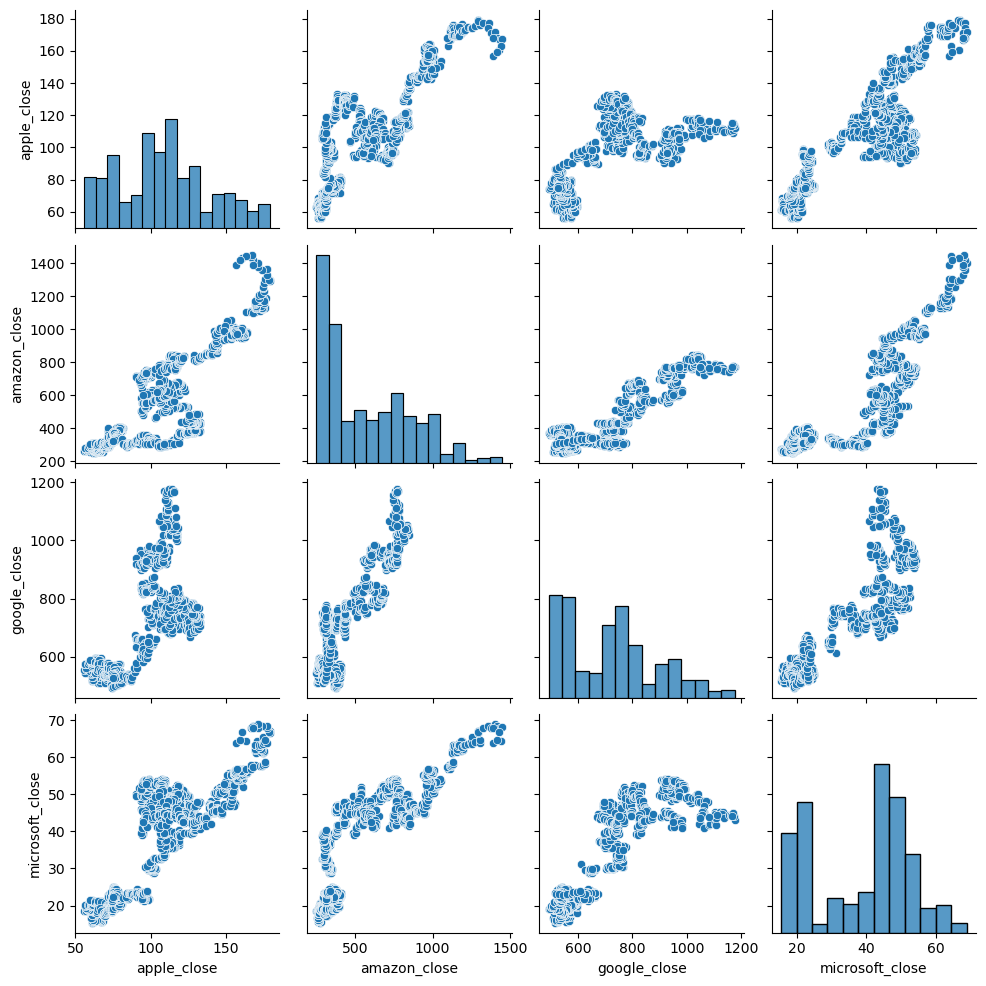

In [57]:
sns.pairplot(closing_price)

In [58]:
closing_price.corr()

,apple_close,amazon_close,google_close,microsoft_close
apple_close,1.000000,0.819078,0.640522,0.863711
amazon_close,0.819078,1.000000,0.888456,0.842778
google_close,0.640522,0.888456,1.000000,0.852676
microsoft_close,0.863711,0.842778,0.852676,1.000000


<Axes: >

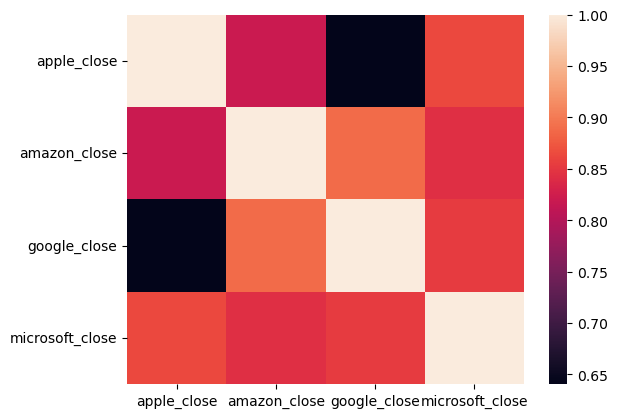

In [59]:
sns.heatmap(closing_price.corr())

<Axes: >

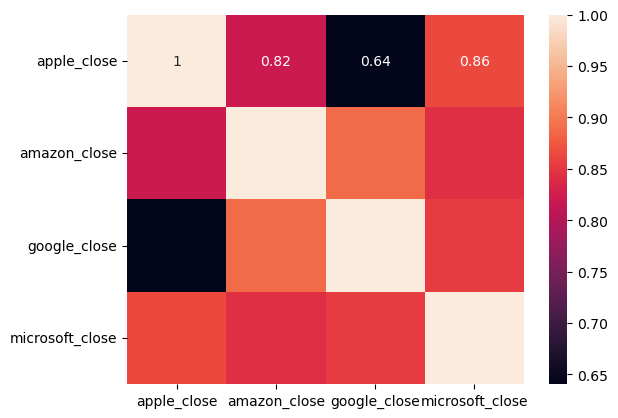

In [61]:
sns.heatmap(closing_price.corr(), annot=True)

# Perform Correlation Anlysis between closing price and the daily return of the correlation

In [62]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [63]:
closing_price['apple_close'].shift(1) # which means looka the table up its going to be
# (68.56-67.85)/67.85 *100 

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [67]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1)*100

0            NaN
1            NaN
2       0.010422
3      -0.025067
4      -0.001903
          ...   
1254    0.002755
1255    0.002090
1256   -0.043390
1257   -0.024984
1258    0.041792
Name: apple_close, Length: 1259, dtype: float64

In [69]:
for col in closing_price.columns:
    closing_price[col + 'pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1)*100

In [70]:
closing_price

,apple_close,amazon_close,google_close,microsoft_close,apple_closepct_change,amazon_closepct_change,google_closepct_change,microsoft_closepct_change
0,NaN,261.95,558.46,15.6133,NaN,NaN,NaN,NaN
1,67.8542,257.21,559.99,15.8167,NaN,-1.809506,0.273968,1.302735
2,68.5614,258.70,556.97,15.5867,1.042235,0.579293,-0.539295,-1.454159
3,66.8428,269.47,567.16,15.8967,-2.506658,4.163123,1.829542,1.988875
4,66.7156,269.24,567.00,15.8967,-0.190297,-0.085353,-0.028211,0.000000
...,...,...,...,...,...,...,...,...
1254,167.4300,1390.00,NaN,67.9300,0.275499,-4.196734,NaN,-0.439689
1255,167.7800,1429.95,NaN,66.6300,0.209043,2.874101,NaN,-1.913735
1256,160.5000,1390.00,NaN,63.8500,-4.339015,-2.793804,NaN,-4.172295
1257,156.4900,1442.84,NaN,64.2100,-2.498442,3.801439,NaN,0.563821


In [71]:
closing_price.columns

Index(['apple_close', 'amazon_close', 'google_close', 'microsoft_close',
       'apple_closepct_change', 'amazon_closepct_change',
       'google_closepct_change', 'microsoft_closepct_change'],
      dtype='object')

In [73]:
clsing_p = closing_price[['apple_closepct_change', 'amazon_closepct_change',
       'google_closepct_change', 'microsoft_closepct_change']]

In [74]:
clsing_p

,apple_closepct_change,amazon_closepct_change,google_closepct_change,microsoft_closepct_change
0,NaN,NaN,NaN,NaN
1,NaN,-1.809506,0.273968,1.302735
2,1.042235,0.579293,-0.539295,-1.454159
3,-2.506658,4.163123,1.829542,1.988875
4,-0.190297,-0.085353,-0.028211,0.000000
...,...,...,...,...
1254,0.275499,-4.196734,NaN,-0.439689
1255,0.209043,2.874101,NaN,-1.913735
1256,-4.339015,-2.793804,NaN,-4.172295
1257,-2.498442,3.801439,NaN,0.563821


c:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

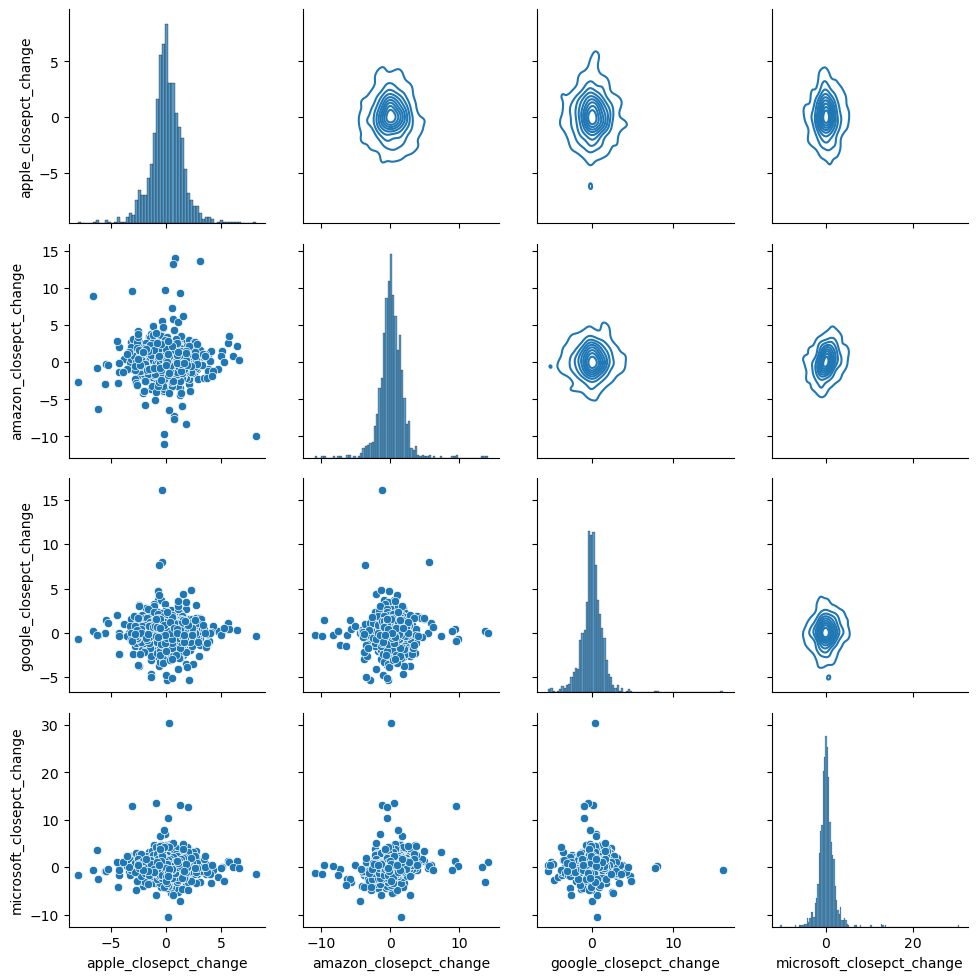

In [78]:
g = sns.PairGrid(data = clsing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [79]:
clsing_p.corr()

,apple_closepct_change,amazon_closepct_change,google_closepct_change,microsoft_closepct_change
apple_closepct_change,1.000000,-0.003992,-0.000736,-0.010386
amazon_closepct_change,-0.003992,1.000000,0.027698,0.216654
google_closepct_change,-0.000736,0.027698,1.000000,0.020586
microsoft_closepct_change,-0.010386,0.216654,0.020586,1.000000
